## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

# Ans
---

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
cal = datasets.fetch_california_housing()

In [42]:
cal.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [43]:
df_cal = pd.DataFrame(cal.data, columns=cal.feature_names)

df_cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_cal[['MedInc']], cal.target, test_size=0.2, random_state=88)

reg = linear_model.LinearRegression()

In [62]:
reg.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred = reg.predict(x_test)

y_pred

array([2.97327058, 1.25533927, 1.649138  , ..., 2.67518624, 1.46175996,
       2.41234751])

In [64]:
print(reg.coef_)

[0.41760205]


In [65]:
mse = mean_squared_error(y_test, y_pred)

print(mse)

r2 = r2_score(y_test, y_pred)

print(r2)

0.6857836035296464
0.46738364513339914


In [66]:
print(x_test.shape)
print(y_test.shape)
print(y_pred.shape)

(4128, 1)
(4128,)
(4128,)


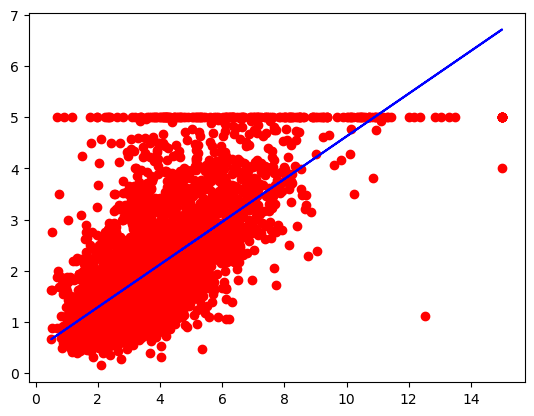

In [67]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue')

plt.show()

## Lasso

In [68]:
lasso = linear_model.Lasso(alpha=0.5)

In [69]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.5)

In [70]:
y_pred_ls = lasso.predict(x_test)

y_pred_ls

array([2.67866281, 1.52346596, 1.78826994, ..., 2.47822051, 1.66227042,
       2.3014786 ])

In [73]:
print(r2_score(y_test, y_pred_ls))

0.4163040782089732


## Ridge

In [75]:
ridge = linear_model.Ridge(alpha=0.5)

In [76]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [77]:
y_pred_rg = ridge.predict(x_test)

y_pred_rg

array([2.97326313, 1.25534605, 1.64914152, ..., 2.67518126, 1.46176503,
       2.4123447 ])

In [78]:
print(r2_score(y_test, y_pred_rg))

0.46738361235382686


In [85]:
print('normal: ', r2_score(y_test, y_pred),
     '\nLasso: ', r2_score(y_test, y_pred_ls),
     '\nRidge: ', r2_score(y_test, y_pred_rg))

normal:  0.46738364513339914 
Lasso:  0.4163040782089732 
Ridge:  0.46738361235382686
